In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
df=pd.read_csv("/content/cleaned_dataset_flight.csv")

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
FlightNum,0
TailNum,0
ActualElapsedTime,0


## Data preparation

### Subtask:
Convert relevant columns to appropriate data types for analysis and visualization.


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['DepTime'] = pd.to_datetime(df['DepTime'], format='%H:%M', errors='coerce').dt.time
df['ArrTime'] = pd.to_datetime(df['ArrTime'], format='%H:%M', errors='coerce').dt.time
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for col in delay_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

## Analyze delay causes by airline

Calculate and compare different types of delays (CarrierDelay, WeatherDelay, NASDelay) for each airline.


In [19]:
airline_delay_means = df.groupby('Airline')[['CarrierDelay', 'WeatherDelay', 'NASDelay']].mean()
display(airline_delay_means)

,CarrierDelay,WeatherDelay,NASDelay
Airline,,,
American Eagle Airlines Inc.,17.018600,6.620168,13.145879
Atlantic Southeast Airlines,37.479698,4.601918,7.683534
Delta Air Lines Inc.,21.926729,6.402617,16.699439
Frontier Airlines Inc.,17.052490,0.515478,13.816285
Hawaiian Airlines Inc.,35.739437,2.549296,0.000000
Skywest Airlines Inc.,22.197816,6.644828,20.616557
Southwest Airlines Co.,10.445792,2.134329,6.638113
US Airways Inc.,16.561384,1.148251,13.196987
United Air Lines Inc.,18.913820,2.461652,17.254857


<Figure size 1200x600 with 0 Axes>

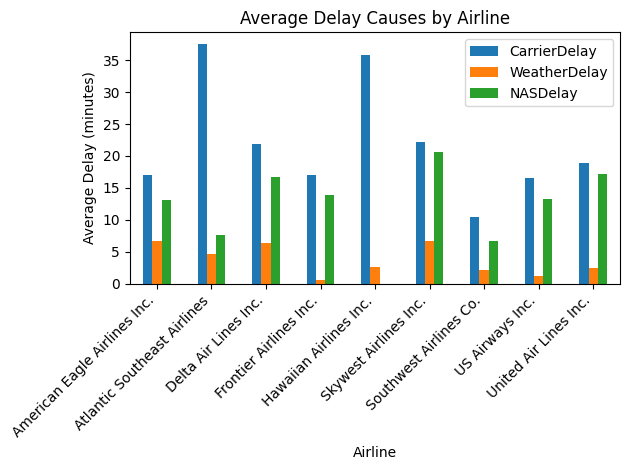

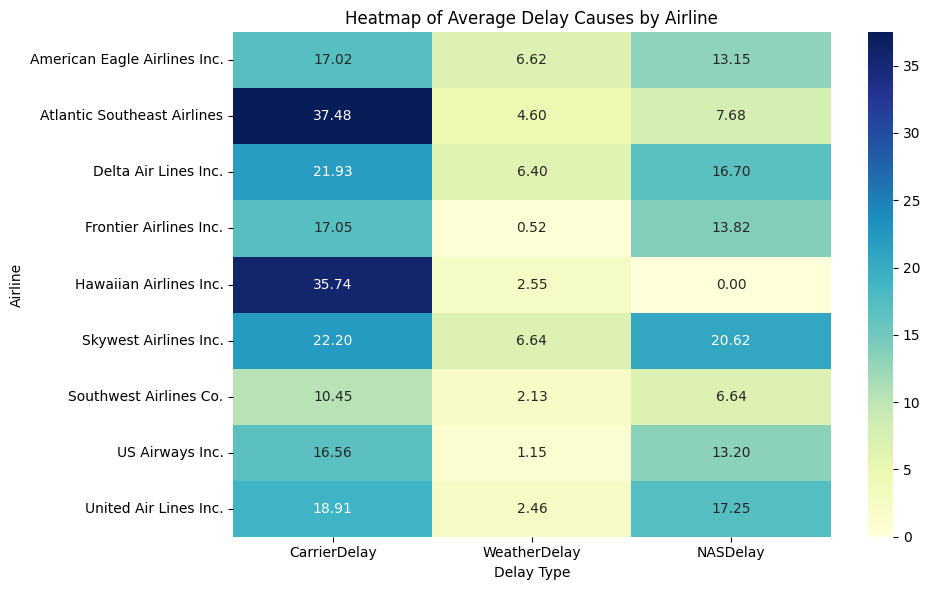

In [20]:
plt.figure(figsize=(12, 6))
airline_delay_means.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay Causes by Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(airline_delay_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Average Delay Causes by Airline')
plt.xlabel('Delay Type')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

/tmp/ipython-input-320297848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DepHour'] = pd.to_datetime(df['DepTime'].astype(str)).dt.hour
/tmp/ipython-input-320297848.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ArrHour'] = pd.to_datetime(df['ArrTime'].astype(str)).dt.hour


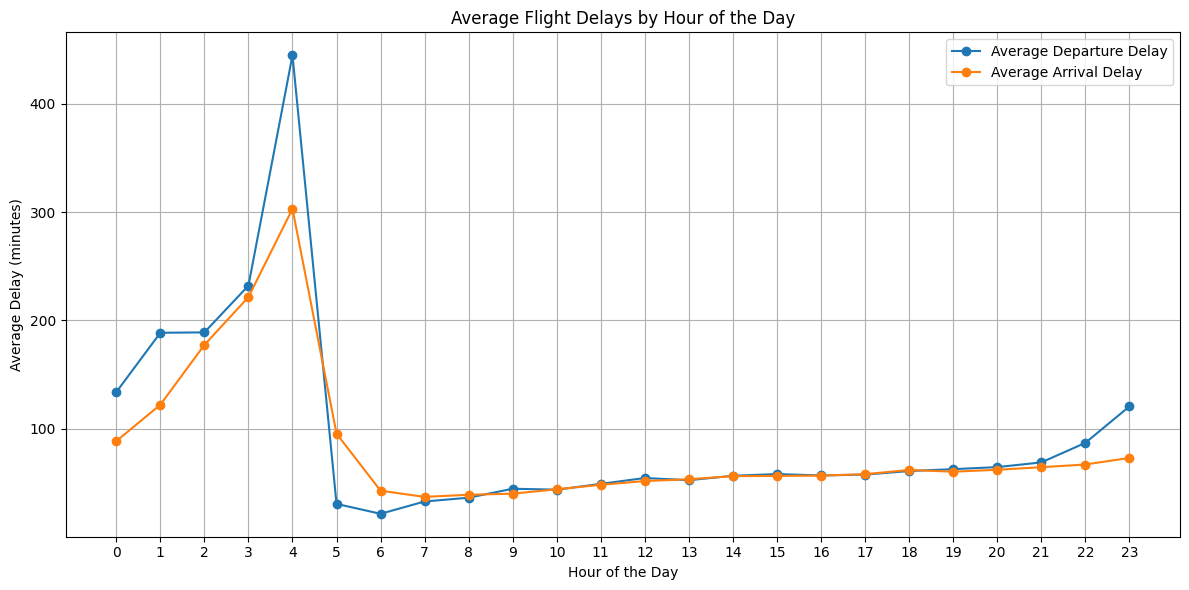

In [21]:
df['DepHour'] = pd.to_datetime(df['DepTime'].astype(str)).dt.hour
df['ArrHour'] = pd.to_datetime(df['ArrTime'].astype(str)).dt.hour

hourly_dep_delay = df.groupby('DepHour')['DepDelay'].mean()
hourly_arr_delay = df.groupby('ArrHour')['ArrDelay'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_dep_delay.index, hourly_dep_delay.values, marker='o', label='Average Departure Delay')
plt.plot(hourly_arr_delay.index, hourly_arr_delay.values, marker='o', label='Average Arrival Delay')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Flight Delays by Hour of the Day')
plt.xticks(hourly_dep_delay.index)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
origin_airport_delay = df.groupby('Origin')['DepDelay'].mean()
dest_airport_delay = df.groupby('Dest')['ArrDelay'].mean()

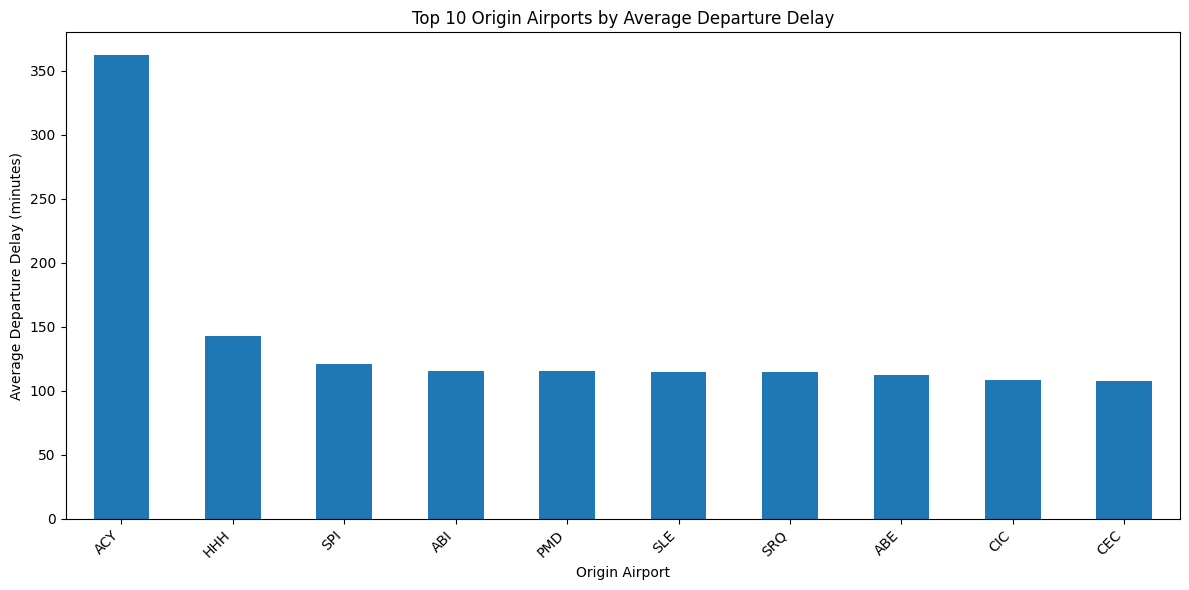

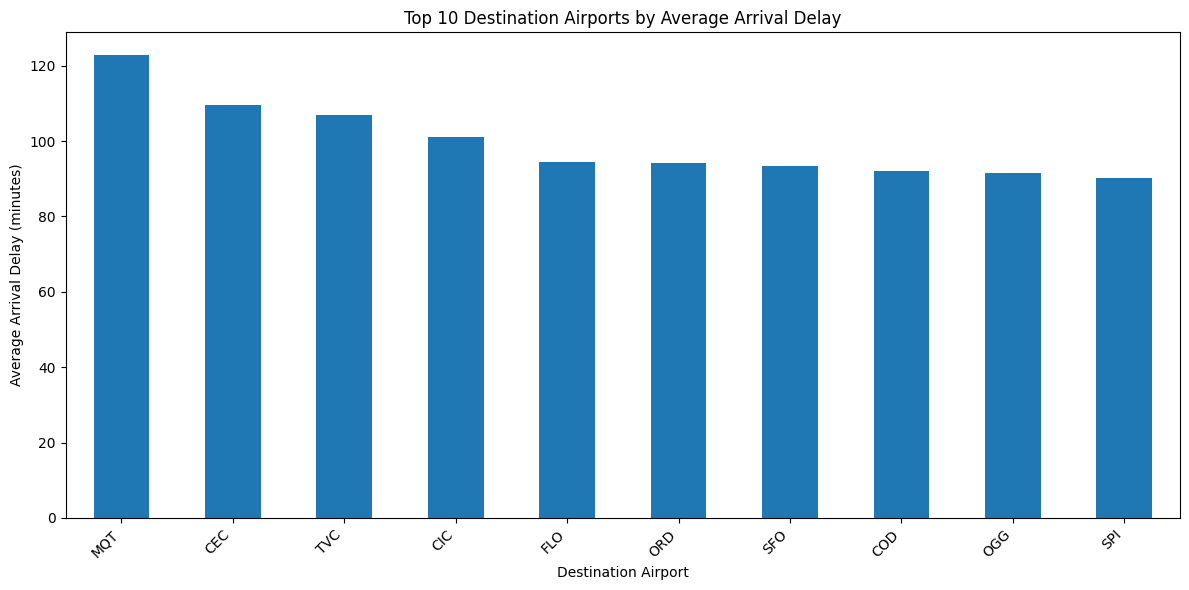

In [23]:
plt.figure(figsize=(12, 6))
origin_airport_delay.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Top 10 Origin Airports by Average Departure Delay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
dest_airport_delay.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Destination Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Top 10 Destination Airports by Average Arrival Delay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
max_dep_delay_hour = hourly_dep_delay.idxmax()
max_arr_delay_hour = hourly_arr_delay.idxmax()
max_origin_delay_airport = origin_airport_delay.idxmax()
max_dest_delay_airport = dest_airport_delay.idxmax()

print(f"Hour with maximum average departure delay: {max_dep_delay_hour}")
print(f"Hour with maximum average arrival delay: {max_arr_delay_hour}")
print(f"Origin airport with maximum average departure delay: {max_origin_delay_airport}")
print(f"Destination airport with maximum average arrival delay: {max_dest_delay_airport}")

Hour with maximum average departure delay: 4.0
Hour with maximum average arrival delay: 4.0
Origin airport with maximum average departure delay: ACY
Destination airport with maximum average arrival delay: MQT


In [25]:
df['TotalDelay'] = df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum(axis=1)
airline_total_delay_means = df.groupby('Airline')['TotalDelay'].mean()
top_airlines_by_total_delay = airline_total_delay_means.sort_values(ascending=False)
display(top_airlines_by_total_delay)

,TotalDelay
Airline,
Skywest Airlines Inc.,77.125444
United Air Lines Inc.,73.396096
American Eagle Airlines Inc.,64.785011
Delta Air Lines Inc.,64.256822
Hawaiian Airlines Inc.,58.507042
Atlantic Southeast Airlines,56.142828
US Airways Inc.,52.999070
Southwest Airlines Co.,51.307253
Frontier Airlines Inc.,41.321669


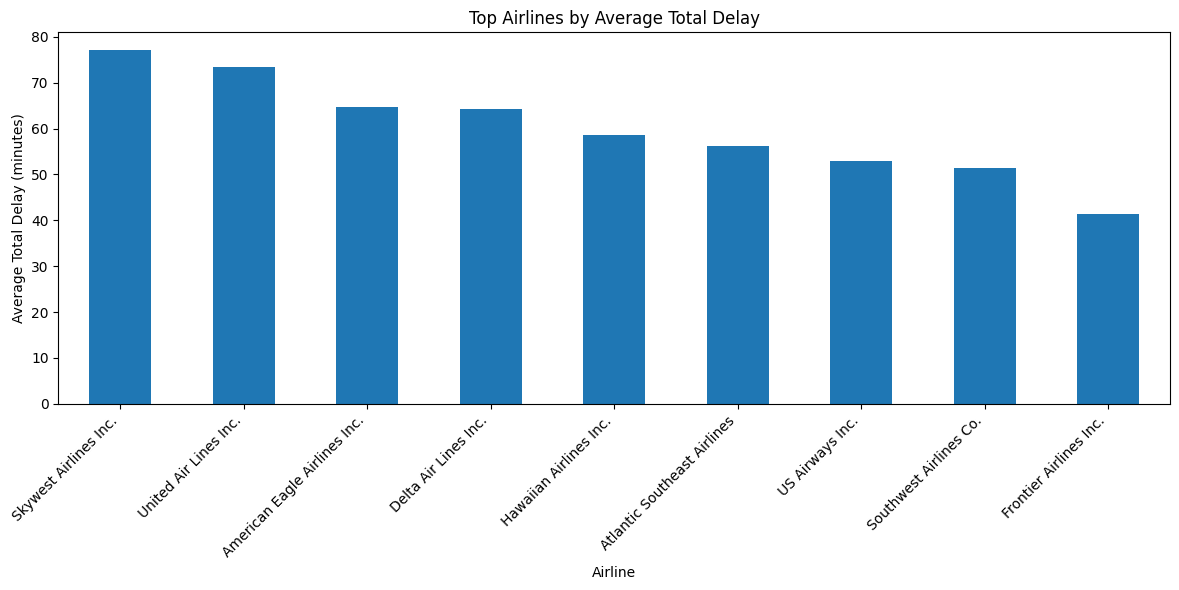

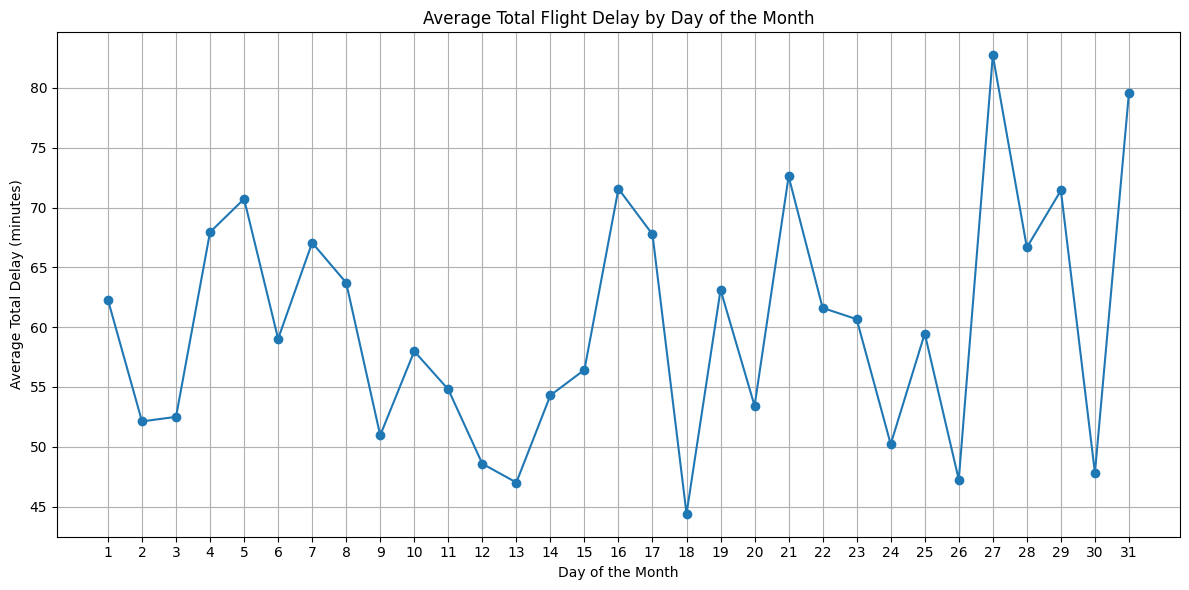

/tmp/ipython-input-3135893527.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dayofweek_total_delay = df.groupby('DayOfWeek')['TotalDelay'].mean()


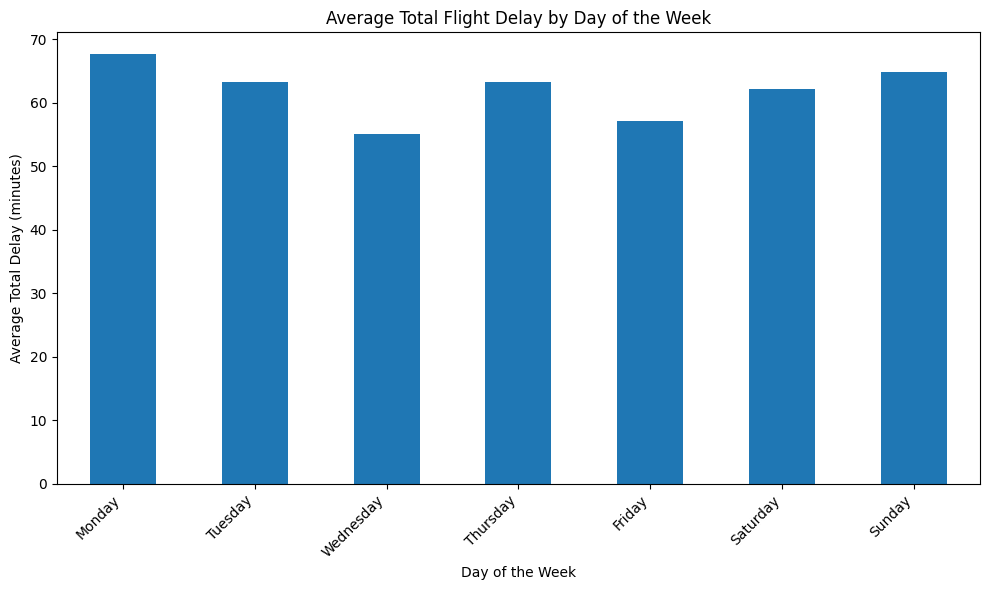

In [26]:
# 6. Bar plot of top airlines by total delay
plt.figure(figsize=(12, 6))
top_airlines_by_total_delay.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Average Total Delay (minutes)')
plt.title('Top Airlines by Average Total Delay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Line plot of average total delay over the month
df['Day'] = df['Date'].dt.day
daily_total_delay = df.groupby('Day')['TotalDelay'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_total_delay.index, daily_total_delay.values, marker='o')
plt.xlabel('Day of the Month')
plt.ylabel('Average Total Delay (minutes)')
plt.title('Average Total Flight Delay by Day of the Month')
plt.xticks(daily_total_delay.index)
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Bar plot of average total delay by day of the week
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=dayofweek_order, ordered=True)
dayofweek_total_delay = df.groupby('DayOfWeek')['TotalDelay'].mean()

plt.figure(figsize=(10, 6))
dayofweek_total_delay.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Delay (minutes)')
plt.title('Average Total Flight Delay by Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
peak_dep_delay_hour = max_dep_delay_hour
peak_arr_delay_hour = max_arr_delay_hour
peak_origin_delay_airport = max_origin_delay_airport
peak_dest_delay_airport = max_dest_delay_airport
top_delay_prone_carriers = top_airlines_by_total_delay.head(3).index.tolist()

print("Summary of Peak Delays and Top Delay-Prone Carriers:")
print(f"Peak average departure delay occurs around hour: {peak_dep_delay_hour}")
print(f"Peak average arrival delay occurs around hour: {peak_arr_delay_hour}")
print(f"Origin airport with the highest average departure delay: {peak_origin_delay_airport}")
print(f"Destination airport with the highest average arrival delay: {peak_dest_delay_airport}")
print(f"Top 3 delay-prone carriers by average total delay: {', '.join(top_delay_prone_carriers)}")

Summary of Peak Delays and Top Delay-Prone Carriers:
Peak average departure delay occurs around hour: 4.0
Peak average arrival delay occurs around hour: 4.0
Origin airport with the highest average departure delay: ACY
Destination airport with the highest average arrival delay: MQT
Top 3 delay-prone carriers by average total delay: Skywest Airlines Inc., United Air Lines Inc., American Eagle Airlines Inc.
